In [53]:
library(data.table,quietly = T)
library(matrixStats)
library(ggpubr)
library(gplots)
library(RColorBrewer)

# Using Schizophrenia Traning dataset (GSE84727) to identify Variable Systemic Probes that are not CoRSIVs

In [3]:
GSE84727_450k <- fread("./GEO/GSE84727_normalisedBetas.csv", header = T,data.table=FALSE)

In [4]:
head(GSE84727_450k)

,V1,3998567027_R01C01,3998567027_R02C01,3998567027_R03C01,3998567027_R04C01,3998567027_R05C01,3998567027_R06C01,3998567027_R01C02,3998567027_R02C02,3998567027_R03C02,⋯,3998567028_R03C01,3998567028_R04C01,3998567028_R05C01,3998567028_R06C01,3998567028_R01C02,3998567028_R02C02,3998567028_R03C02,3998567028_R04C02,3998567028_R05C02,3998567028_R06C02
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cg00000029,0.3951779,0.3697138,0.4754829,0.3752867,0.4239904,0.4085137,0.3941888,0.3573973,0.4419718,⋯,0.4124664,0.4315060,0.4235561,0.4662213,0.4090291,0.4711545,0.4123318,0.3914435,0.4317174,0.4321023
2,cg00000108,0.8850499,0.8861082,0.9132594,0.9123288,0.8813215,0.9148125,0.9190253,0.9064143,0.9144355,⋯,0.8928076,0.9083726,0.8906904,0.9155963,0.8966884,0.9000132,0.8970585,0.8980482,0.8614940,0.9011801
3,cg00000109,0.7775310,0.7833273,0.7467315,0.7957073,0.7835391,0.7592240,0.7812306,0.7961762,0.7801551,⋯,0.7379957,0.7538531,0.7118557,0.7588672,0.8055145,0.8103121,0.7656893,0.7886314,0.7935206,0.7776754
4,cg00000165,0.1813788,0.1777234,0.1619180,0.2325961,0.1763311,0.1853667,0.1964556,0.2259631,0.1475368,⋯,0.1563242,0.1681514,0.1249430,0.1834647,0.2132666,0.1779705,0.1500052,0.1517269,0.1297733,0.1143564
5,cg00000236,0.6497446,0.6645536,0.5528640,0.6799475,0.7101150,0.6785969,0.7095483,0.6288747,0.6962633,⋯,0.6194409,0.6182603,0.6738420,0.6135562,0.7279781,0.6096097,0.6435412,0.6839337,0.6424429,0.7125943
6,cg00000289,0.4738142,0.5500045,0.4502785,0.5861261,0.4554845,0.4973513,0.4876053,0.5263687,0.4671441,⋯,0.5284827,0.5620394,0.5164728,0.5332281,0.5348108,0.5366806,0.5386198,0.5090211,0.5713607,0.5337446


In [5]:
GSE84727_450k_temp <- as.data.frame(subset(GSE84727_450k,select = -c(V1)))

In [6]:
rownames(GSE84727_450k_temp) <- GSE84727_450k$V1

In [8]:
dim(GSE84727_450k_temp)

[1] 420374    847

## Calculate DNA methylation quantile for 2% and 98% for each 450k probe

In [9]:
DF1_2_98 <- apply(GSE84727_450k_temp,1,quantile,probs=c(0.02,0.98))

In [10]:
head(DF1_2_98)

,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,⋯,ch.9.84051654F,ch.9.84078312F,ch.9.86947500F,ch.9.87682774F,ch.9.88862796F,ch.9.90287778F,ch.9.919537F,ch.9.945770F,ch.9.98959675F,ch.9.991104F
2%,0.3244433,0.856980,0.7041018,0.1239069,0.5747896,0.4069392,0.7488953,0.1752780,0.2465783,0.02330203,⋯,0.02621387,0.02214427,0.03229524,0.09014884,0.02642226,0.02291229,0.08871723,0.02768153,0.1031630,0.06340539
98%,0.5025971,0.931568,0.8422354,0.2339937,0.7281382,0.6140541,0.8430295,0.3355489,0.3930082,0.05079486,⋯,0.05693213,0.04619994,0.06787066,0.16338338,0.05197231,0.05788966,0.16768742,0.06945792,0.2608796,0.17113819


In [18]:
library("ggExtra")
temp <- data.frame(t(DF1_2_98))
colnames(temp)<-c("X1","X2")
temp$Range <- temp$X2 -  temp$X1
temp$Variance <- rowVars(as.matrix(GSE84727_450k_temp))
temp$CG <- GSE84727_450k$V1
temp_range <- temp[order(temp$Range,decreasing = T),]

temp <- data.frame(t(DF1_2_98))
colnames(temp)<-c("X1","X2")
temp$Range <- temp$X2 -  temp$X1
temp$Variance <- rowVars(as.matrix(GSE84727_450k_temp))
temp$CG <- GSE84727_450k$V1
temp_va <- temp[order(temp$Variance,decreasing = T),]

min_Range <- min(temp[order(temp$Variance,decreasing = T),][1:2500,]$Range)
min_var <- min(temp[order(temp$Variance,decreasing = T),][1:2500,]$Variance)

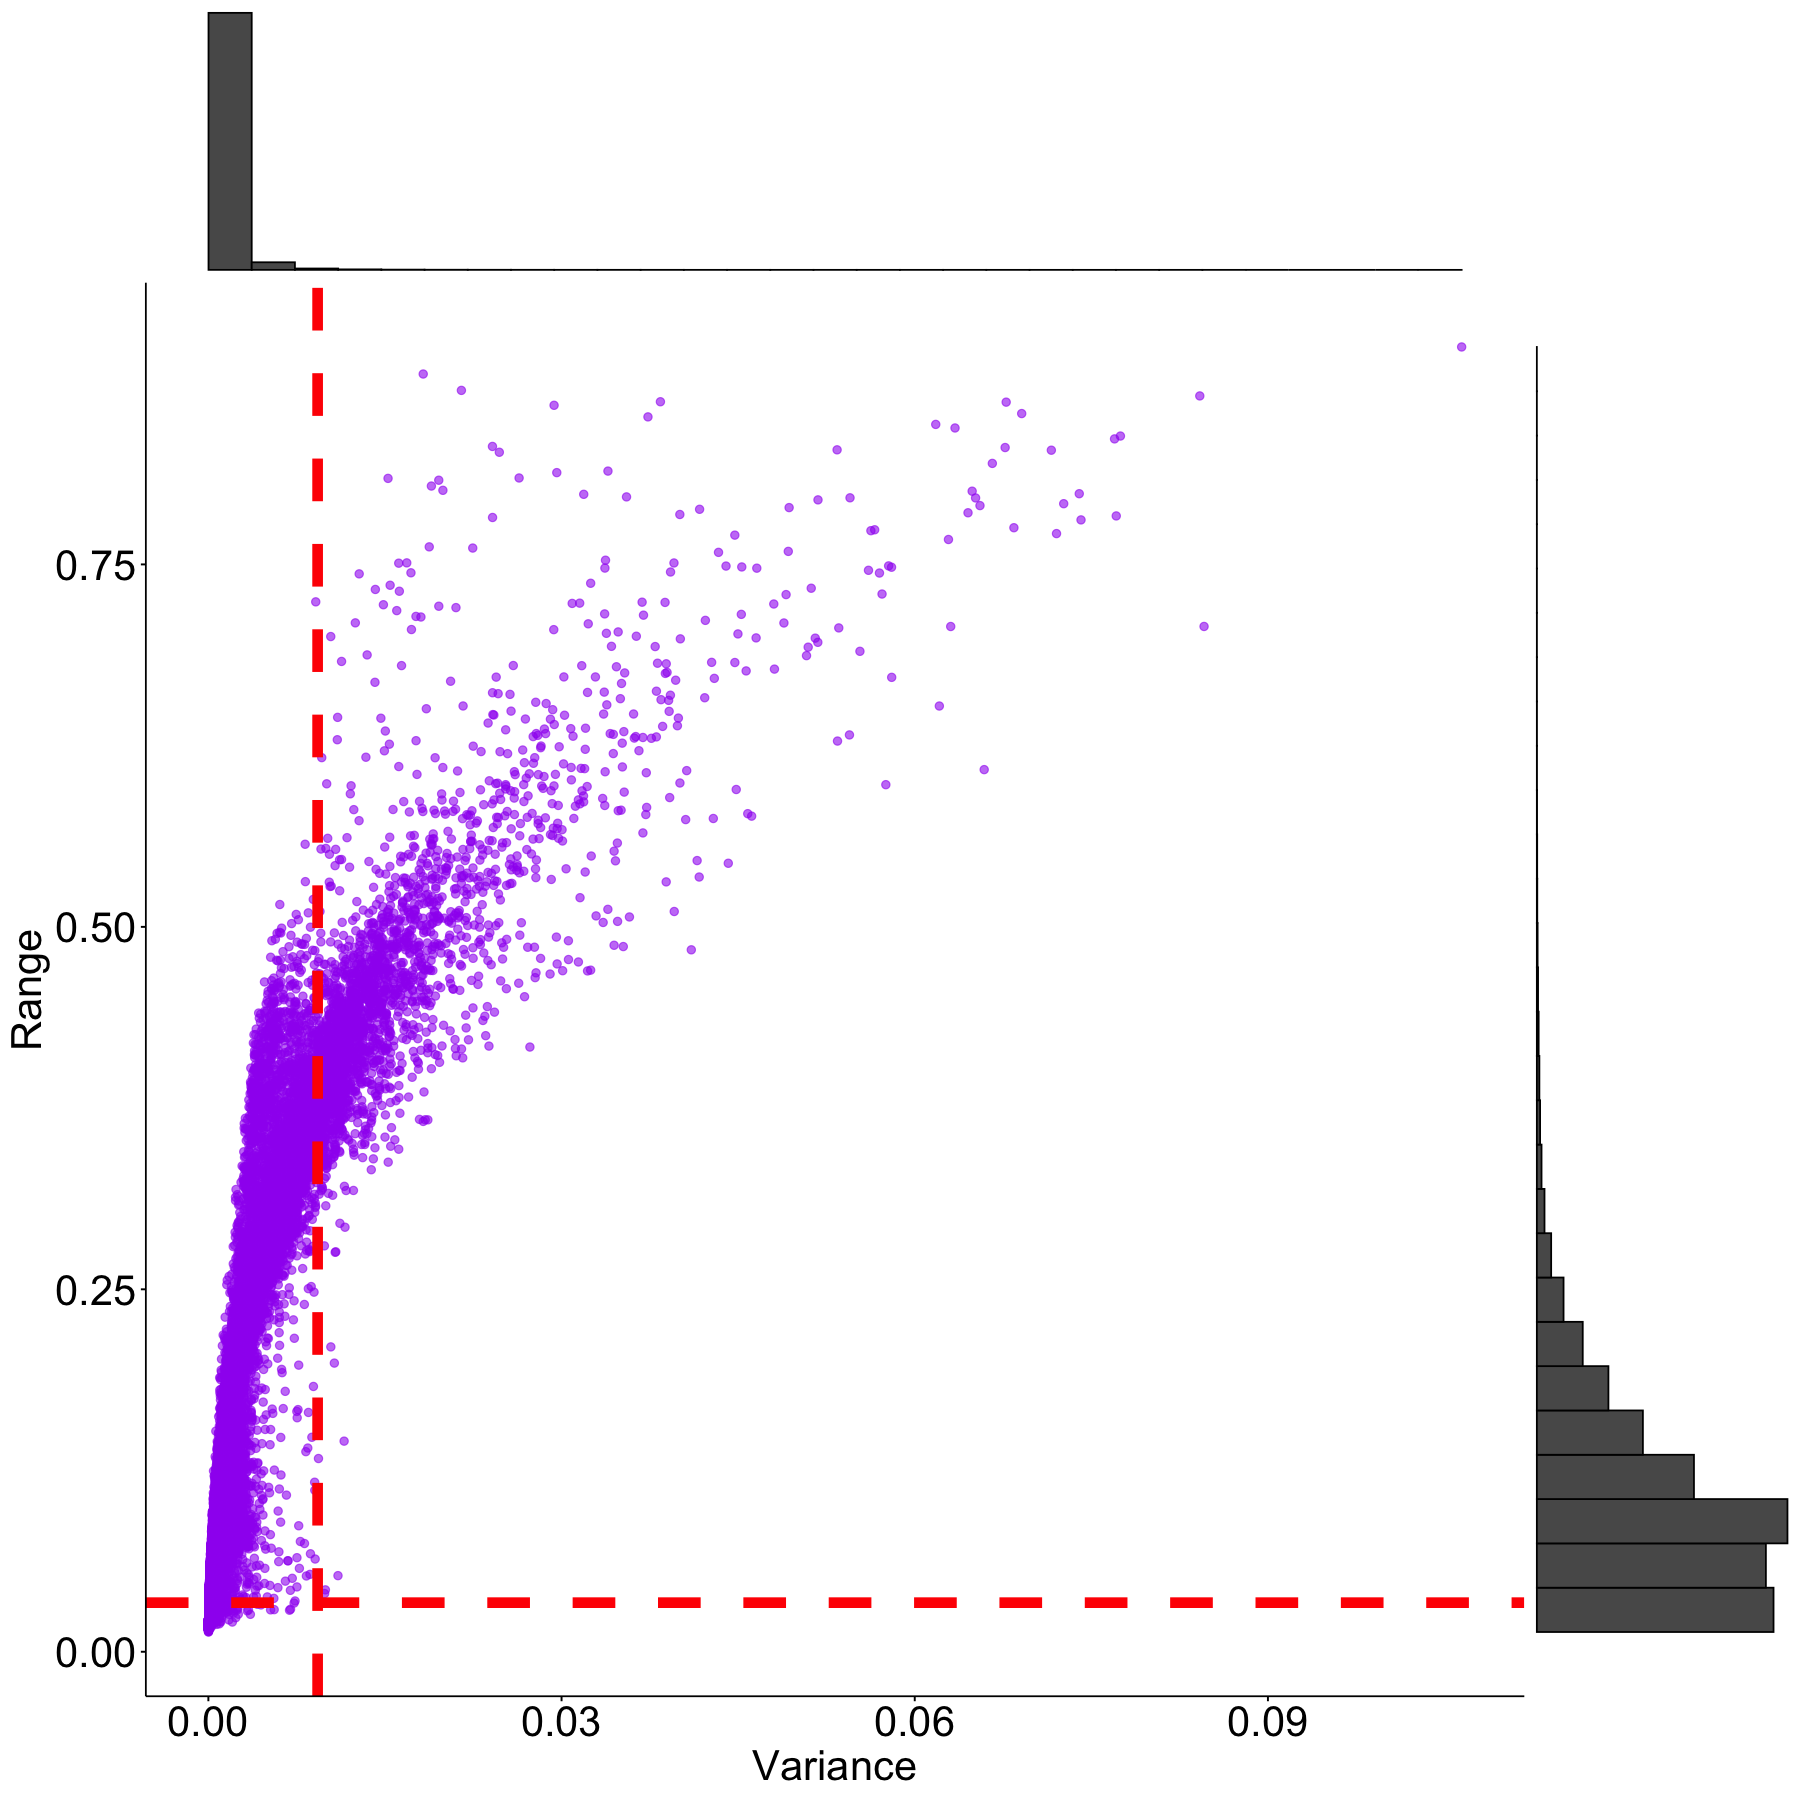

In [19]:
options(repr.plot.width=15, repr.plot.height=15)
sp <- ggscatter(temp, x = "Variance", y = "Range",alpha = 0.6,
                color = "purple")+theme(text = element_text(size=25)) + 
                geom_hline(yintercept=min_Range, linetype="dashed", color = "red",size=3)+
                    geom_vline(xintercept=min_var, linetype="dashed", color = "red",size=3)
ggMarginal(sp, type = "histogram",margins="both")

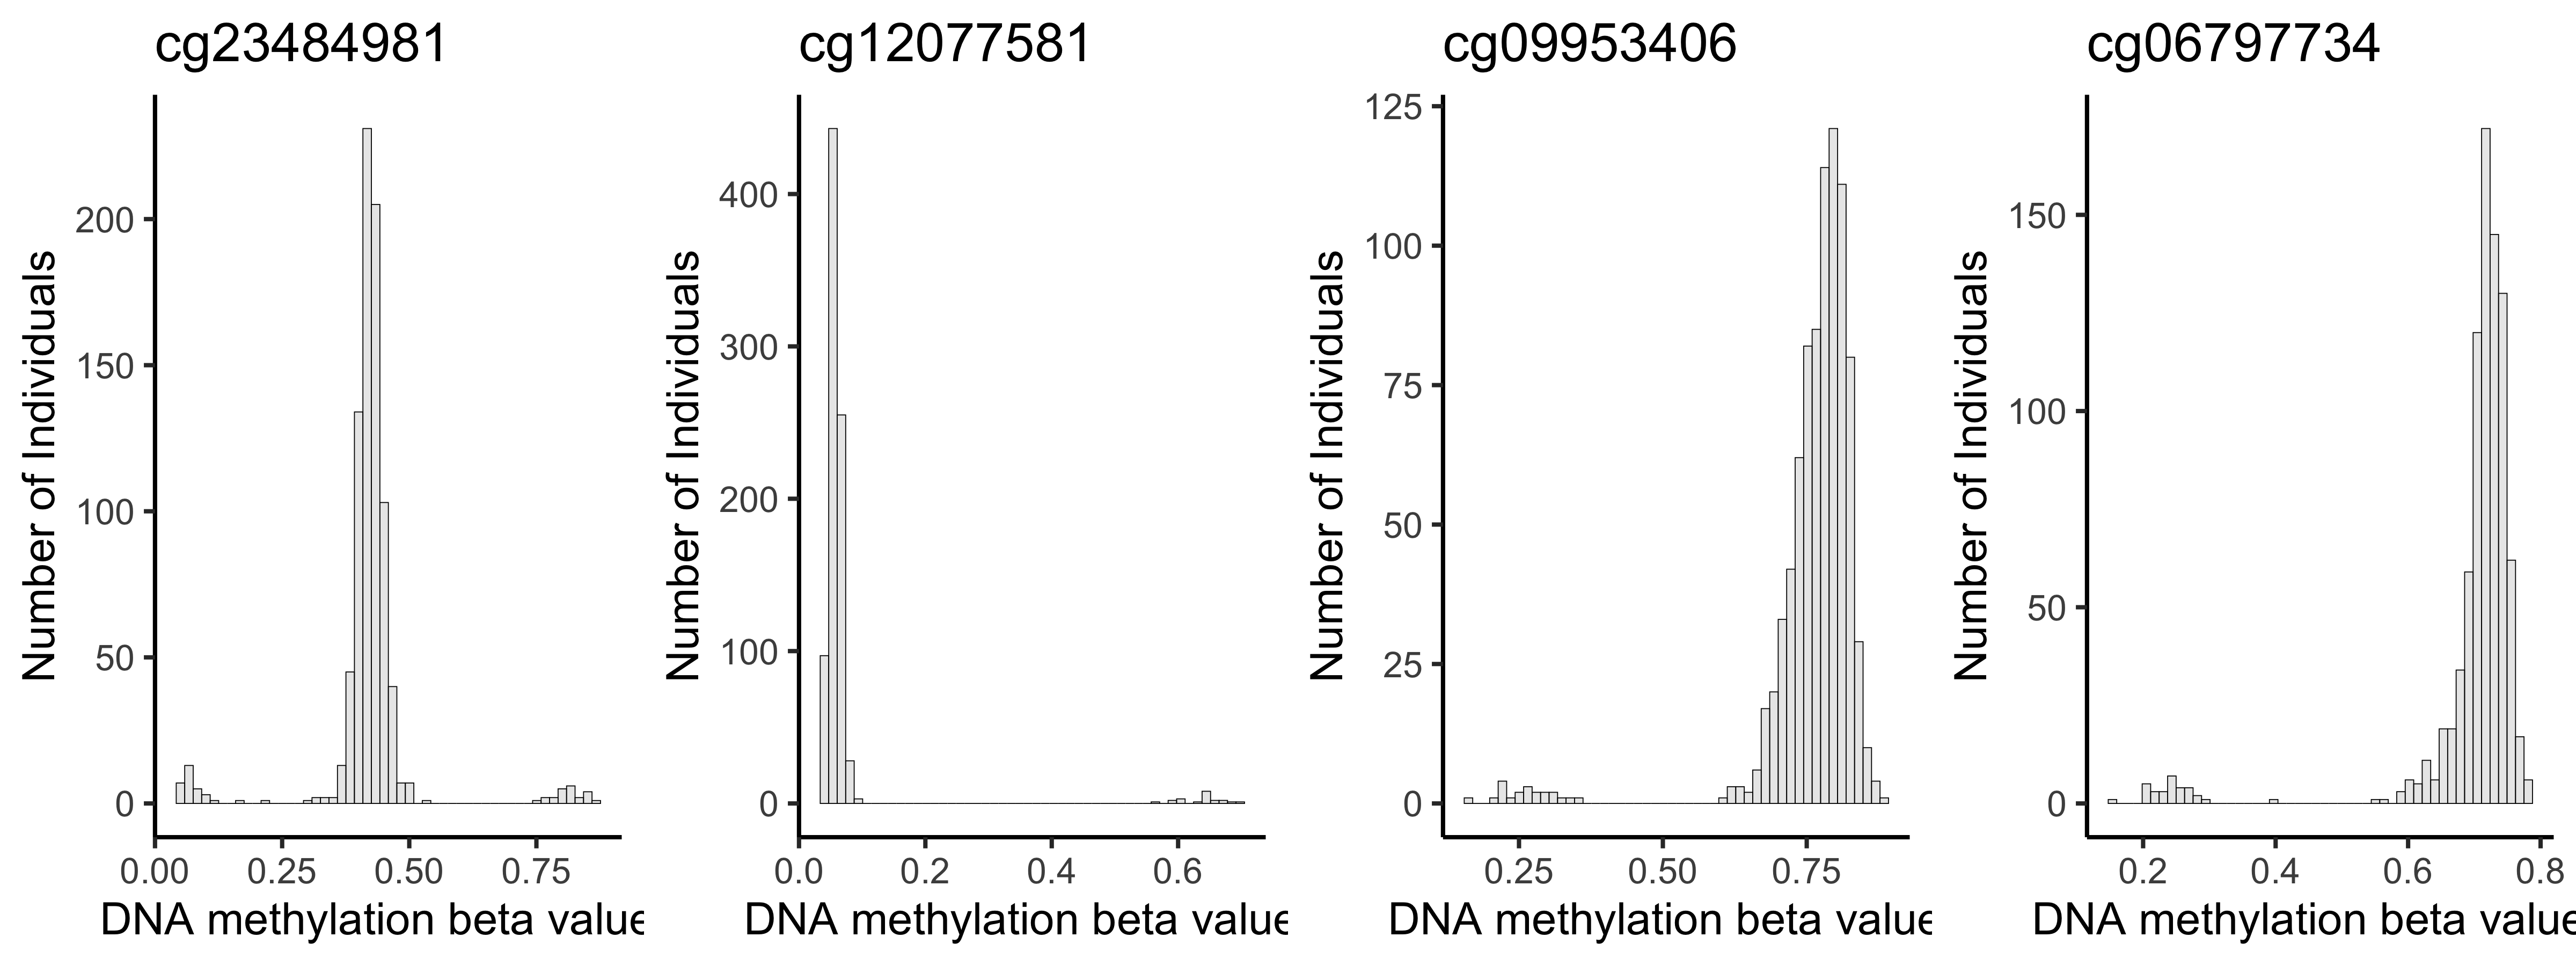

In [54]:
# few top range probes
options(repr.plot.width=5, repr.plot.height=5)
p1 <- gghistogram(as.numeric(GSE84727_450k_temp['cg23484981',]),title = "cg23484981",
            fill = "lightgray",bins = 50)+xlab("DNA methylation beta values")+ylab("Number of Individuals")+
            theme_classic(base_size = 50)




p2 <- gghistogram(as.numeric(GSE84727_450k_temp['cg12077581',]),title = "cg12077581",
            fill = "lightgray",bins = 50)+xlab("DNA methylation beta values")+ylab("Number of Individuals")+
theme_classic(base_size = 50)
#temp[temp$CG=='cg26287080',]



p3 <- gghistogram(as.numeric(GSE84727_450k_temp['cg09953406',]),title = "cg09953406",
            fill = "lightgray",bins = 50)+xlab("DNA methylation beta values")+ylab("Number of Individuals")+
theme_classic(base_size = 50)
#temp[temp$CG=='cg23484981',]



p4 <- gghistogram(as.numeric(GSE84727_450k_temp['cg06797734',]),title = "cg06797734",
            fill = "lightgray",bins = 50)+xlab("DNA methylation beta values")+ylab("Number of Individuals")+
theme_classic(base_size = 50)
#temp[temp$CG=='cg12426467',]


options(repr.plot.width=40, repr.plot.height=15)
library(gridExtra)
do.call(grid.arrange,c(list(p1,p2,p3,p4),ncol=4))

In [49]:
blood_brain_corrlations <- read.table("./Blood_Brain_Pearson_CoRR.txt",sep = " ",header = T)
head(blood_brain_corrlations)

,Blood.vs.CER,Blood.vs.STG,Blood.vs.PFC,Blood.vs.EC,probe_id
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.073186444,0.262599025,0.1279926,0.099451024,cg00000029
2,0.055851930,-0.041051331,0.2303407,-0.056085975,cg00000108
3,0.122785504,0.004476664,-0.2487932,0.056156542,cg00000109
4,-0.007058393,0.008950982,0.1080755,0.090457671,cg00000165
5,-0.193015498,0.058928032,0.0198772,-0.003483462,cg00000236
6,-0.031787066,0.018381015,-0.1480315,0.133296479,cg00000289


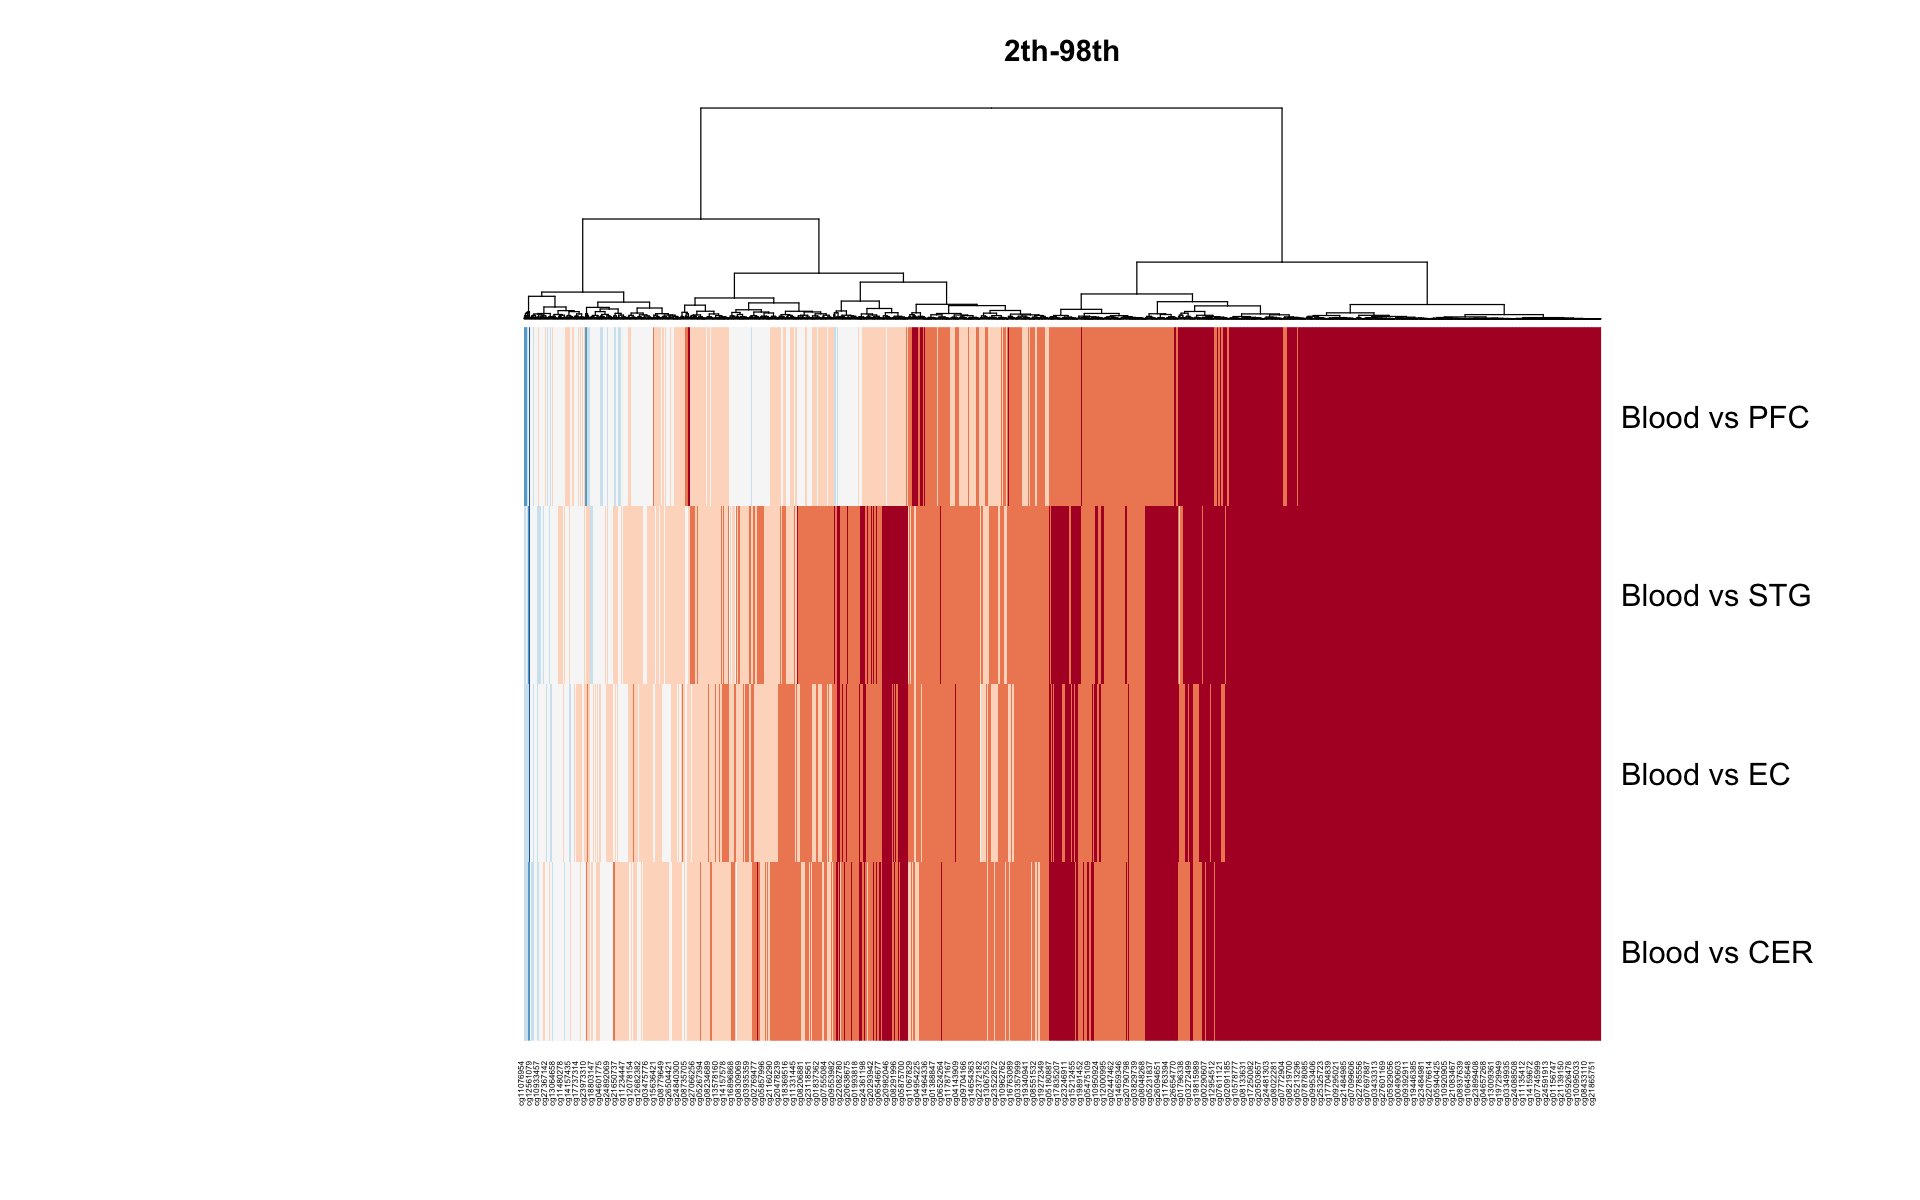

In [55]:
data <- subset(blood_brain_corrlations, probe_id %in% temp_range[1:2500,]$CG)
rownames(data) <- data$probe_id
data$probe_id <- NULL

options(repr.plot.width=16, repr.plot.height=10)
heatmap.2(as.matrix(t(data)),main = "2th-98th",col=rev(brewer.pal(7,"RdBu")),
          # hclustfun = function(x) hclust(x,method="single"),
          trace="none",margins = c(8, 16),key=FALSE,
          distfun = function(x) dist(x, method="euclidian"),
          hclustfun = function(x) hclust(x,method="ward.D2"),scale="none",dendrogram='column',Rowv=FALSE,
          labRow = c('Blood vs PFC','Blood vs STG','Blood vs EC','Blood vs CER')
)